# Classification Tester

In [28]:
import os
import json
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from SoundDS import SoundDS
from AudioUtils import AudioUtils
from TrainingUtils import TrainingUtils

## Prepare Data

In [29]:
DATA_PATH = r'C:\Users\Lloyd Acha\Documents\ACHA_Files\Projects\Programming\DataSets\UrbanSound8K' #Data set path
metadata = os.path.join(DATA_PATH, 'metadata', 'UrbanSound8K.csv')
audio_path = os.path.join(DATA_PATH, 'audio')

In [30]:
df = pd.read_csv(metadata)
df['relative_path'] = 'fold' + df['fold'].astype(str) + '/' + df['slice_file_name'].astype(str)
df = df[['relative_path', 'classID', 'class']]
DS = SoundDS(df, audio_path)

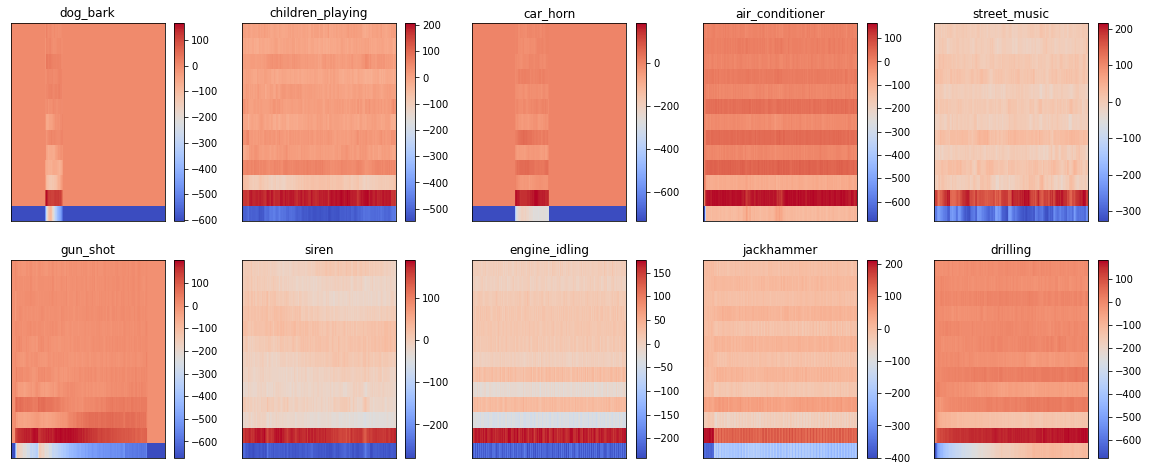

In [41]:
samples = {}
for index, row in df.iterrows():
    if row['class'] not in samples.keys():
        samples[row['class']] = row['relative_path']
count = 0
plt.figure(figsize=(20,8))
for k in samples.keys():
    count += 1
    p = samples[k]
    sample_file = os.path.join(audio_path,p)
    aud = AudioUtils.open(sample_file)
    aud = AudioUtils.pad_trunc(aud, 3000)
    plt.subplot(2, 5, count)
    mfcc = AudioUtils.mfcc(aud)
    plt.title(k)
    librosa.display.specshow(mfcc, sr = aud[1], hop_length = 512)
    plt.colorbar()
plt.show()

In [4]:
x_raw, y_raw = [],[]
for idx, data in enumerate(DS):
    x, y = data
    x_raw.append(x)
    y_raw.append(y)

0
99
198
297
396
495
594
693
792
891
990
1089
1188
1287
1386
1485
1584
1683
1782
1881
1980
2079
2178
2277
2376
2475
2574
2673
2772
2871
2970
3069
3168
3267
3366
3465
3564
3663
3762
3861
3960
4059
4158
4257
4356
4455
4554
4653
4752
4851
4950
5049
5148
5247
5346
5445
5544
5643
5742
5841
5940
6039
6138
6237
6336
6435
6534
6633
6732
6831
6930
7029
7128
7227
7326
7425
7524
7623
7722
7821
7920
8019
8118
8217
8316
8415
8514
8613
8712


KeyError: 8732

In [7]:
np.array(x_raw).shape, np.array(y_raw).shape

((8732, 258, 13), (8732,))

## Train

In [8]:
inputs = TrainingUtils.prepare_input(x_raw, y_raw)
model = TrainingUtils.createmodel()

In [9]:
TrainingUtils.train(model, inputs['x_train'], inputs['y_train'], 50)

Epoch 1/50
247/247 [==============================] - 13s 52ms/step - loss: 1.4019 - categorical_accuracy: 0.5194
Epoch 2/50
247/247 [==============================] - 12s 50ms/step - loss: 0.9696 - categorical_accuracy: 0.6642
Epoch 3/50
247/247 [==============================] - 13s 51ms/step - loss: 0.8064 - categorical_accuracy: 0.7256
Epoch 4/50
247/247 [==============================] - 13s 51ms/step - loss: 0.6751 - categorical_accuracy: 0.7681
Epoch 5/50
247/247 [==============================] - 13s 51ms/step - loss: 0.6170 - categorical_accuracy: 0.7925
Epoch 6/50
247/247 [==============================] - 12s 50ms/step - loss: 0.5558 - categorical_accuracy: 0.8113
Epoch 7/50
247/247 [==============================] - 13s 51ms/step - loss: 0.5111 - categorical_accuracy: 0.8279
Epoch 8/50
247/247 [==============================] - 13s 52ms/step - loss: 0.4471 - categorical_accuracy: 0.8481
Epoch 9/50
247/247 [==============================] - 13s 51ms/step - loss: 0.3945 - cat

## Evaluate

In [10]:
test_error, accuracy = model.evaluate(inputs['x_test'], inputs['y_test'], verbose=1)

14/14 [==============================] - 0s 11ms/step - loss: 1.0012 - categorical_accuracy: 0.7895


## Predict

In [14]:
pred_idx = 3
pred = model.predict(np.expand_dims(inputs['x_eval'][pred_idx], axis=0))
pred.argmax() == inputs['y_eval'][pred_idx].argmax()

True